<a href="https://colab.research.google.com/github/chaintwk/229352-StatisticalLearning-or-Statistical-Learning-Labs/blob/main/660510770_Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [ ]:
import pandas as pd
import graphviz

from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("/content/heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [ ]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [ ]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

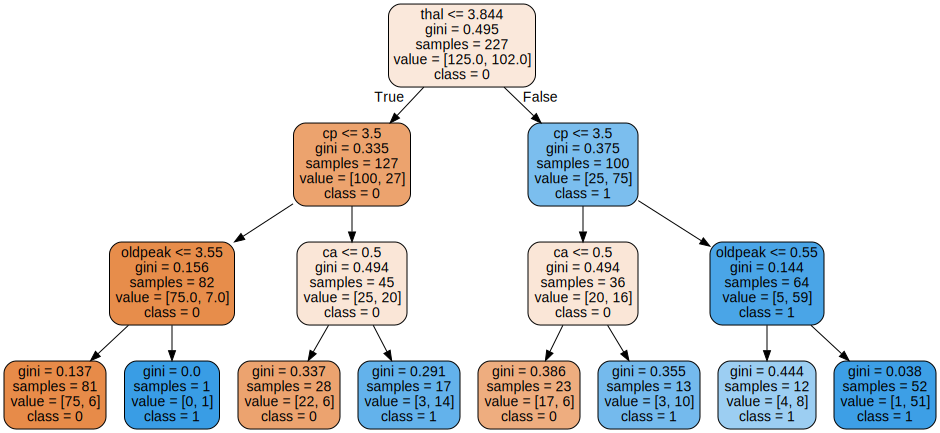

In [ ]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1], #บอกชื่อตัวแปรvisualization
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph #condition เป็นจริงไปซ้าย เป็นเท็จไปขวา

In [ ]:
data.columns[:-1] #ดูตัวแปรต้นที่เราใช้

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
bagged_treees = BaggingClassifier(estimator=clf, n_estimators=100, max_samples=0.5)
bagged_treees.fit(X_train, y_train)
print(classification_report(y_test, bagged_treees.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.85      0.78      0.82        37

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [ ]:
#แม่นยำกว่า
forest = RandomForestClassifier(n_estimators=200, max_depth=6)
forest.fit(X_train, y_train)
print(classification_report(y_test, forest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        39
           1       0.85      0.78      0.82        37

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [ ]:
#ลองใช้พารามิเตอร์ที่หลากหลาย หวังว่าจะสูงกว่า 0.75 ลองเลื่อนพารามิเตอร์ 3 ตัวแล้วใช้กริตเสิร์ชแล้วดูพารามิเตอร์ไหนทำให้มีความแม่นยำกว่า แล้วให้รีพอร์ตค่าทั้ง 2 (fi_macro,accuracy)ออกมา

In [ ]:
#decision tree
from sklearn.metrics import accuracy_score, f1_score

# Create a decision tree
clf = DecisionTreeClassifier(random_state=42)

# Hyperparameters อย่างน้อย 3 ตัว
params = {
    'max_depth': [3, 6, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

gridcv = GridSearchCV(clf, params, scoring='f1_macro', cv=5)
gridcv.fit(X_train, y_train)

# พยากรณ์บน test set
y_pred = gridcv.best_estimator_.predict(X_test)

# Evaluate
acc_dt = accuracy_score(y_test, y_pred)
f1_dt = f1_score(y_test, y_pred, average='macro')

print(classification_report(y_test, grid_bag.predict(X_test)))


              precision    recall  f1-score   support

           0       0.74      0.87      0.80        39
           1       0.83      0.68      0.75        37

    accuracy                           0.78        76
   macro avg       0.79      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



In [ ]:
bag = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

params_bag = {
    'n_estimators': [10, 50, 100],
    'estimator__max_depth': [3, 6, None],
    'max_samples': [0.5, 0.8, 1.0]
}

grid_bag = GridSearchCV(bag, params_bag, scoring='f1_macro', cv=5)
grid_bag.fit(X_train, y_train)
y_pred_bag = grid_bag.best_estimator_.predict(X_test)

acc_bag = accuracy_score(y_test, y_pred_bag)
f1_bag = f1_score(y_test, y_pred_bag, average='macro')

print(classification_report(y_test, grid_bag.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80        39
           1       0.83      0.68      0.75        37

    accuracy                           0.78        76
   macro avg       0.79      0.77      0.77        76
weighted avg       0.78      0.78      0.77        76



In [ ]:
rf = RandomForestClassifier(random_state=42)

params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, None],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(rf, params_rf, scoring='f1_macro', cv=5)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

print(classification_report(y_test, grid_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        39
           1       0.87      0.70      0.78        37

    accuracy                           0.80        76
   macro avg       0.81      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



In [ ]:
grid_rf.best_estimator_


RandomForestClassifier(max_depth=3, n_estimators=200, random_state=42)

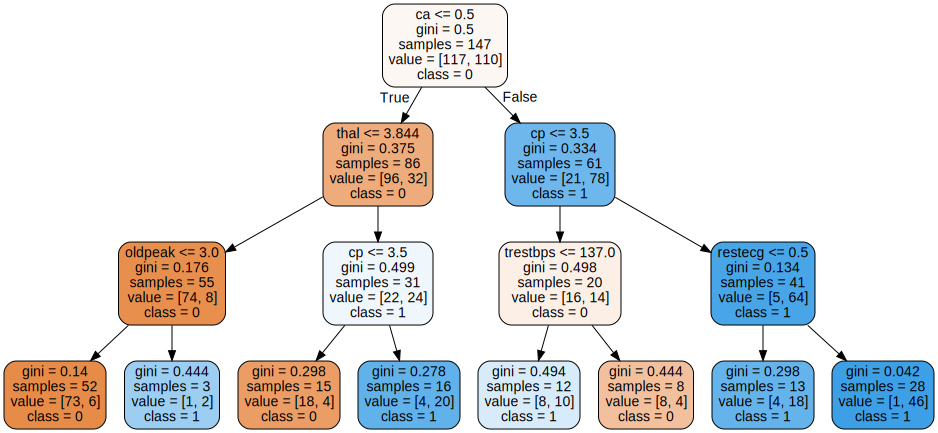

In [ ]:
best_rf = grid_rf.best_estimator_

first_tree = best_rf.estimators_[0]

#exportต้นไม้แรก
plot_data = export_graphviz(first_tree,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph


# **Ans:** โมเดล Random Forest ที่ผ่านการปรับแต่งแล้วสามารถให้ผลลัพธ์ที่ดีทั้งในด้าน Accuracy และ F1 Macro โดยเฉพาะเมื่อจำแนกข้อมูลที่มีความไม่สมดุลระหว่างคลาส การจำกัดความลึกของต้นไม้ (max_depth=3) ช่วยลดความซับซ้อนและลดโอกาส overfittingจำนวนฟีเจอร์ที่ใช้ในการ split (max_features) = 'sqrt' และกำหนด random_state = 42 เพื่อให้ผลลัพธ์สามารถทำซ้ำได้